In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

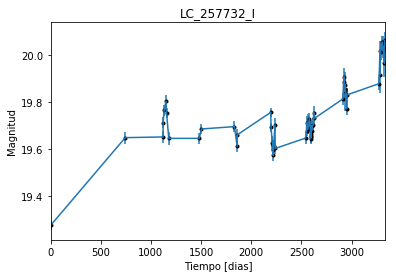

In [2]:
data = np.genfromtxt('LC_257732_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_257732_I')
plt.savefig("LC_257732_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

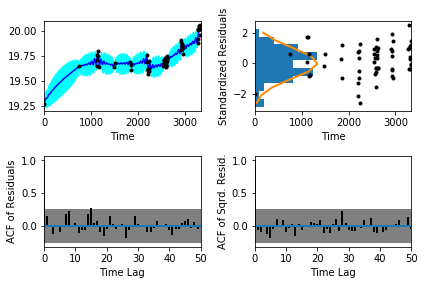

In [5]:
sample.assess_fit()

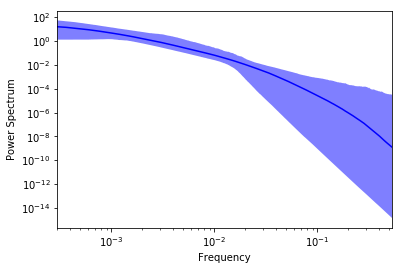

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

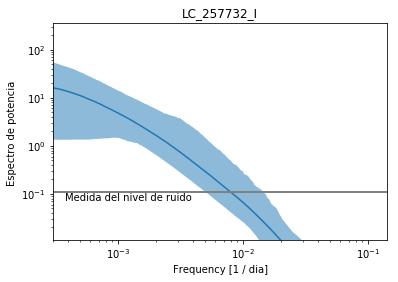

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_257732_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_257732_I')

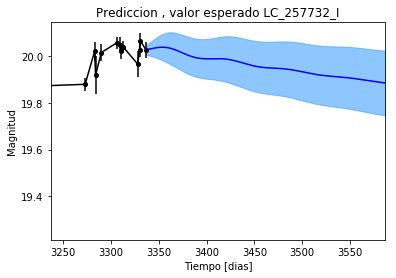

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_257732_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_257732_I')

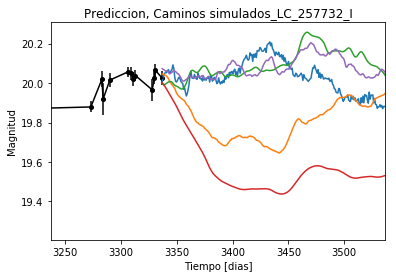

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_257732_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


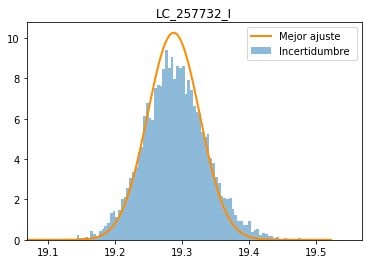

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_257732_I')
plt.savefig("Mejor_ajuste_LC_257732_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_257732_I')

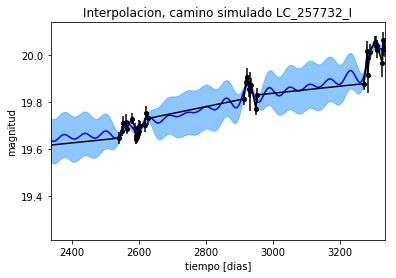

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_257732_I')

Text(0.5,1,'Interpolacion, camino simulado LC_257732_I')

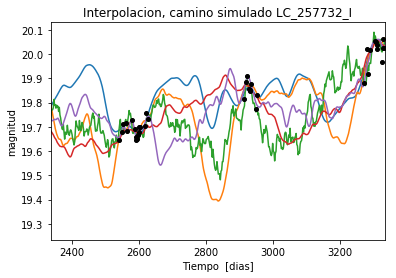

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_257732_I')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 362.107121226
Median: 0.0214570618747
Standard deviation: 0.217177826871
68% credibility interval: [ 0.00200123  0.24005044]
95% credibility interval: [  4.62280573e-04   8.57176560e-01]
99% credibility interval: [  3.30957775e-04   1.01422659e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 308.538786995
Median: 0.00816416517868
Standard deviation: 0.115087807728
68% credibility interval: [ 0.00085123  0.06584503]
95% credibility interval: [  3.53248283e-04   3.83437864e-01]
99% credibility interval: [  3.10749917e-04   8.71448227e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 459.774479459
Median: 0.0721039056373


In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1031.64163886
Median: 114.137993732
Standard deviation: 1.71283716935
68% credibility interval: [ 112.17383405  115.31923576]
95% credibility interval: [ 109.61156452  116.25012726]
99% credibility interval: [ 107.38002844  116.96688046]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 493.25890389
Median: 1.46687491732
Standard deviation: 2.5602574616
68% credibility interval: [ 0.17355866  5.07868017]
95% credibility interval: [ 0.03076567  8.95621057]
99% credibility interval: [  0.01321171  11.85192515]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 528.986327577
Median: 1.96583081582
Standard deviation: 11.969780997
68% credibility interval: [  0.10718984  16.24494973]
95% credibility interval: [  7.79180237e-03

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20009.0787841
Median: 2.73930030355e-34
Standard deviation: 1.05181555847e+45
68% credibility interval: [  5.11734588e-80   2.64714412e-09]
95% credibility interval: [  6.07290232e-143   9.17252667e-001]
99% credibility interval: [  3.80895236e-188   3.23367356e+040]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1550.65892328
Median: 19.677689687
Standard deviation: 0.0888238817028
68% credibility interval: [ 19.59598745  19.7549062 ]
95% credibility interval: [ 19.48206078  19.84927484]
99% credibility interval: [ 19.40915593  19.91249387]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 224.018282342
Median: 0.0393590556773
Standard deviation: 0.287631747146
68% credibility interval: [ 0.          0.52772348]
95% credibility interval: [ 0.         0.9760111]
99% credibility interval: [ 0.          1.04030157]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 224.018282342
Median: 0.0393590556773
Standard deviation: 0.287631747146
68% credibility interval: [ 0.          0.52772348]
95% credibility interval: [ 0.         0.9760111]
99% credibility interval: [ 0.          1.04030157]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 858.491433828
Median: 0.0
Standard deviation: 0.000792481231009
68% credib

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1031.64163886
Median: 114.137993732
Standard deviation: 1.71283716935
68% credibility interval: [ 112.17383405  115.31923576]
95% credibility interval: [ 109.61156452  116.25012726]
99% credibility interval: [ 107.38002844  116.96688046]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1512.20924602
Median: 0.0392523002853
Standard deviation: 0.0262219925136
68% credibility interval: [ 0.02534431  0.0623091 ]
95% credibility interval: [ 0.01739903  0.1121371 ]
99% credibility interval: [ 0.01363839  0.16841494]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1146.57253863
Median: 1.04333698531
Standard deviation: 0.183769626211
68% credibility interval: [ 0.88603797  1.2403413 ]
95% credibility interval: [ 0.75308421  1.47433191]
99% credibility interval: [ 0.67062958  1.64444148]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 320.336270737
Median: 0.00494280054621
Standard deviation: 0.282677047117
68% credibility interval: [ 0.00017647  0.07794495]
95% credibility interval: [  2.89547801e-06   8.66362211e-01]
99% credibility interval: [  2.54091970e-44   2.07628340e+00]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 362.107121226
Median: (-0.134818695907-1.24070394109j)
Standard deviation: 2.26454776673
68% credibility interval: [-1.50828142-5.06556839j -0.01257411-1.11264413j]
95% credibility interval: [ -5.38579917e+00+0.j          -2.90459451e-03-3.17316818j]
99% credibility interval: [ -6.37257363e+00+0.j          -2.07946903e-03-0.11836821j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 308.538786995
Median: (-0.0512969626961+0.44367440002j)
Standard deviation: 1.94654282948
68% credibility interval: [-0.41371652+3.19713478j -0.00534843+0.55673031j]
95% credibility interval: [ -2.40921115e+00+5.82242361j  -2.21952442e-03+0.11922255j]
99% credibility interval: [ -5.47547070e+00+2.9219934j   -1.95249931e-03+0.08984569j]
Poste